In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Explanation of data features:

0. **passengerId**
1. **survival** : survival (0, 1)
2. **class** : passenger class (1, 2, 3)
3. **name** : name
4. **sex** : sex
5. **age** : age
6. **sibsp** : number of sibling/spouses on board
7. **parch** : number of parent/children on board
8. **ticket** : ticket number
9. **fare** : passenger fare
10. **cabin** : cabin
11. **embarked**: the embarking location (S: Southampton, Q: Queenstown, )

In [2]:
# Load the data
data_test = pd.read_csv(r"titanic_test.csv")
data_train = pd.read_csv(r"titanic_train.csv")

In [3]:
data_test.info()
# Checking for missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
data_train["Embarked"].value_counts()
# Viewing the values of embarked column

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [10]:
data_total= pd.concat([data_train, data_test], ignore_index=True, axis=0)
data_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [11]:
data_total.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [12]:
data_total

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [13]:
data_total[data_total["Cabin"].notnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1.0,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1.0,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1295,1296,NaN,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D40,C
1296,1297,NaN,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C
1298,1299,NaN,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C
1302,1303,NaN,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q


In [14]:
# Todo
# 1. Check for missing data of age and cabin
# 2. Fillna with average for age
# 3. Drop cabin
# 4. Dropna for embarked
# 5. Get title, get cabin letter, analyze ticket
# 6. Get dummies for sex and embark
# 7. Build log reg, classification tree, random forest, svm, knn
# 8. Confusion matrix, accuracy, precision, recall, f1 score, cross validation


In [15]:
# Approach 1: Drop all NaN values for Survived, Fillna for Age, Drop Cabin, Dropna for Embarked
data_total1_df1 = data_total.copy()
data_total1_df1 = data_total1_df1.dropna(subset = "Survived", axis=0)
data_total1_df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1.0,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


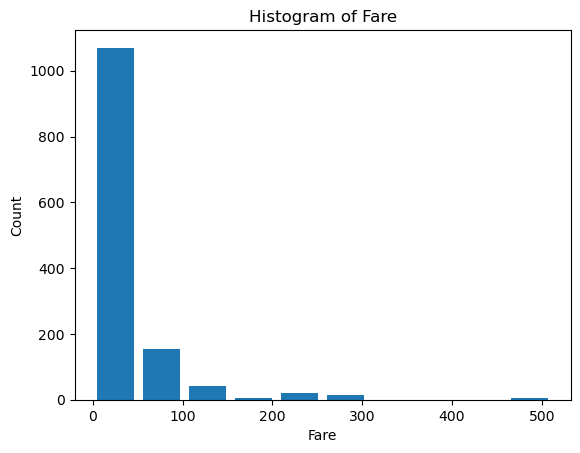

In [16]:
# Visualizing the distribution of fare
data_total['Fare'].plot(kind='hist', rwidth=0.8)
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Histogram of Fare')
plt.show()


In [17]:
# Calculating the IQR for fare
data_total1_df1["Fare"].describe()
IQR = data_total1_df1["Fare"].quantile(0.75) - data_total1_df1["Fare"].quantile(0.25)
print(data_total1_df1["Fare"].quantile(0.25) - 3*IQR, data_total1_df1["Fare"].quantile(0.75) + 3*IQR)

-61.358399999999996 100.2688


<Axes: ylabel='Frequency'>

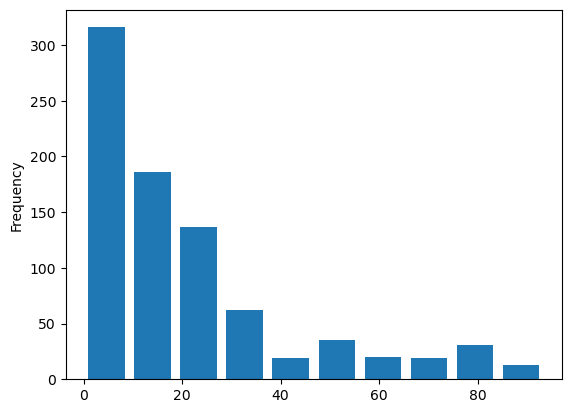

In [18]:
# Dropping the outliers
data_total1_df1 = data_total1_df1[data_total1_df1["Fare"] < 100]
data_total1_df1["Fare"].plot(kind='hist', rwidth=0.8)

<Axes: ylabel='Frequency'>

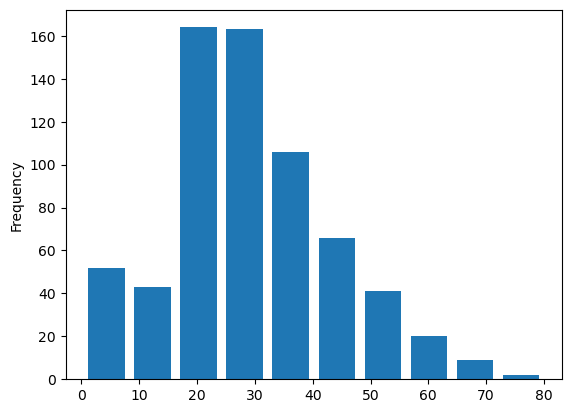

In [19]:
data_total1_df1["Age"].plot(kind='hist', rwidth=0.8)

In [20]:
data_total1_df2 = data_total1_df1.copy()
data_total1_df2["Age"] = data_total1_df1["Age"].fillna(data_total1_df1["Age"].mean())
data_total1_df2 = data_total1_df2.drop("Cabin", axis=1)
data_total1_df2 = data_total1_df2.dropna(subset = ["Embarked"], axis=0)
data_total1_df2.info()
data_total1_df2

<class 'pandas.core.frame.DataFrame'>
Index: 836 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  836 non-null    int64  
 1   Survived     836 non-null    float64
 2   Pclass       836 non-null    int64  
 3   Name         836 non-null    object 
 4   Sex          836 non-null    object 
 5   Age          836 non-null    float64
 6   SibSp        836 non-null    int64  
 7   Parch        836 non-null    int64  
 8   Ticket       836 non-null    object 
 9   Fare         836 non-null    float64
 10  Embarked     836 non-null    object 
dtypes: float64(3), int64(4), object(4)
memory usage: 78.4+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1.0,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.536411,1,2,W./C. 6607,23.4500,S
889,890,1.0,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [21]:
# Group by 'Embarked' and 'Sex', then calculate the count and survival rate for each group
grouped_data = data_total1_df2.groupby(['Embarked', 'Sex']).agg({'Survived': ['count', 'mean', 'sum']})
grouped_data["dead"] =  grouped_data["Survived"]["count"] - grouped_data["Survived"]["sum"]
grouped_data.columns = ['Count', 'Survival Rate', "Survived Count", "Dead Count"] 
grouped_data

Count  Survival Rate  Survived Count  Dead Count
Embarked Sex                                                     
C        female     55       0.836364            46.0         9.0
         male       84       0.309524            26.0        58.0
Q        female     36       0.750000            27.0         9.0
         male       41       0.073171             3.0        38.0
S        female    187       0.673797           126.0        61.0
         male      433       0.168591            73.0       360.0

In [22]:
data_total1_df3 = data_total1_df2.copy()
data_total1_df3.sort_values(by="Ticket")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
759,760,1.0,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.000000,0,0,110152,86.500,S
257,258,1.0,1,"Cherry, Miss. Gladys",female,30.000000,0,0,110152,86.500,S
504,505,1.0,1,"Maioni, Miss. Roberta",female,16.000000,0,0,110152,86.500,S
558,559,1.0,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.000000,1,1,110413,79.650,S
262,263,0.0,1,"Taussig, Mr. Emil",male,52.000000,1,1,110413,79.650,S
...,...,...,...,...,...,...,...,...,...,...,...
235,236,0.0,3,"Harknett, Miss. Alice Phoebe",female,29.536411,0,0,W./C. 6609,7.550,S
92,93,0.0,1,"Chaffee, Mr. Herbert Fuller",male,46.000000,1,0,W.E.P. 5734,61.175,S
219,220,0.0,2,"Harris, Mr. Walter",male,30.000000,0,0,W/C 14208,10.500,S
745,746,0.0,1,"Crosby, Capt. Edward Gifford",male,70.000000,1,1,WE/P 5735,71.000,S


In [23]:
separated = data_total1_df3[data_total1_df3["Ticket"].str.split(" ", expand=True)[0].str.isnumeric() == False]["Ticket"].str.split(" ", expand = True)
whole_numbers =  data_total1_df3[data_total1_df3["Ticket"].str.split(" ", expand=True)[0].str.isnumeric() == True]["Ticket"].str.split(" ", expand = True)
whole_numbers["Filler1"] = np.nan
whole_numbers["Filler2"] = np.nan
whole_numbers["Filler3"] = np.nan
whole_numbers = whole_numbers.reindex(columns = ["Filler1", "Filler2", "Filler3", 0])
whole_numbers.rename(columns={"Filler1": 0, "Filler2" : 1, "Filler3" : 2, 0 : "Number"}, inplace=True)
whole_numbers

,0,1,2,Number
3,NaN,NaN,NaN,113803
4,NaN,NaN,NaN,373450
5,NaN,NaN,NaN,330877
6,NaN,NaN,NaN,17463
7,NaN,NaN,NaN,349909
...,...,...,...,...
885,NaN,NaN,NaN,382652
886,NaN,NaN,NaN,211536
887,NaN,NaN,NaN,112053
889,NaN,NaN,NaN,111369


In [24]:
def check_and_assign(row):
    if pd.to_numeric(row[1], errors='coerce') != None:
        return row[1]
    else:
        return row[2]

In [25]:
separated["Number"] = separated.apply(check_and_assign, axis=1)
separated["Number"] = pd.to_numeric(separated["Number"], errors='coerce')   
separated.loc[separated["Number"].isnull()]

,0,1,2,Number
179,LINE,None,None,NaN
271,LINE,None,None,NaN
302,LINE,None,None,NaN
473,SC/AH,Basle,541,NaN
597,LINE,None,None,NaN


In [26]:
separated["Number"].fillna(17477, inplace=True)
separated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 0 to 888
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       204 non-null    object 
 1   1       200 non-null    object 
 2   2       13 non-null     object 
 3   Number  204 non-null    float64
dtypes: float64(1), object(3)
memory usage: 8.0+ KB


In [27]:
separated_with_whole = pd.concat([separated, whole_numbers], axis=0).sort_index()
only_numbers = separated_with_whole["Number"]
data_total1_df4 = pd.concat([data_total1_df3, only_numbers.astype(int)], axis=1)
data_total1_df4 = data_total1_df4.drop("Ticket", axis=1)

In [28]:
# Feature engineering for name
data_total1_df4

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Number
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,S,21171
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C,17599
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,S,3101282
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,S,113803
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,S,373450
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,13.0000,S,211536
887,888,1.0,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,30.0000,S,112053
888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.536411,1,2,23.4500,S,6607
889,890,1.0,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,30.0000,C,111369


In [29]:
data_total1_df4["Title"] = data_total1_df4["Name"].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

<Axes: xlabel='Title'>

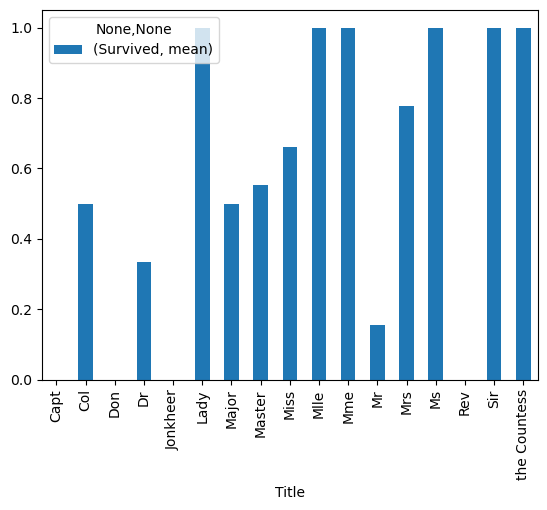

In [30]:
data_total1_df4.groupby("Title").agg({"Survived" : ["mean"]}).plot(kind='bar')
# Rev: Archbishop, a title for a bishop in the Anglican Church

<Axes: xlabel='Title'>

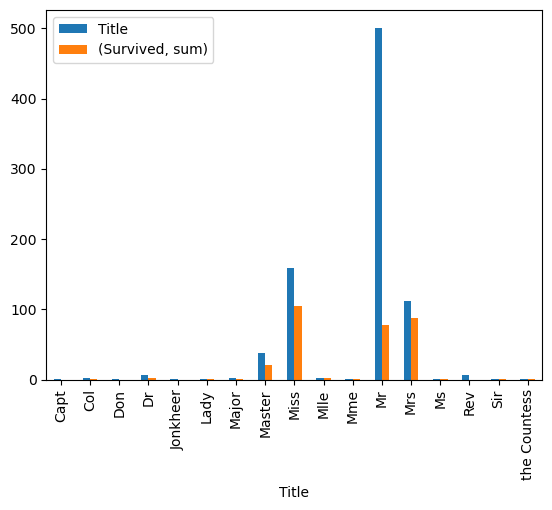

In [31]:
total_title = data_total1_df4.groupby("Title")["Title"].agg("count")
title_survived = data_total1_df4.groupby("Title").agg({"Survived" : ["sum"]}).astype(int)

survived_and_total = pd.concat([total_title, title_survived], axis=1)
survived_and_total.plot(kind='bar')

In [32]:
pd.concat([total_title, title_survived], axis=1)

,Title,"(Survived, sum)"
Title,,
Capt,1,0
Col,2,1
Don,1,0
Dr,6,2
Jonkheer,1,0
Lady,1,1
Major,2,1
Master,38,21
Miss,159,105


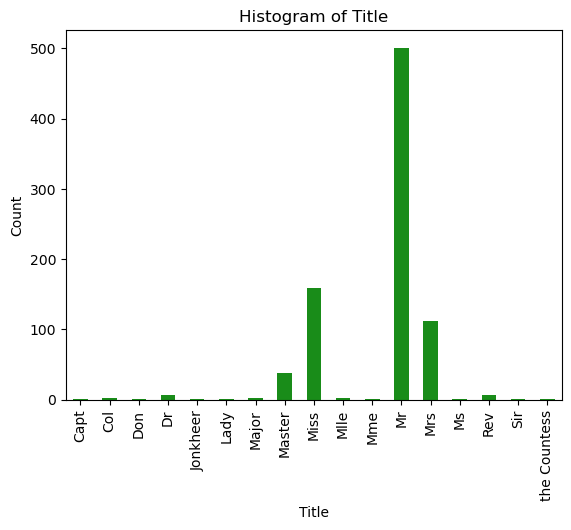

In [33]:
data_total1_df4.groupby("Title")["Title"].agg("count").plot(kind='bar', alpha=0.9, rot = 90, color = "green")
plt.xlabel('Title')
plt.ylabel('Count')
plt.title('Histogram of Title')
plt.show()

In [34]:
data_total1_df4[data_total1_df4["Title"] == "Rev"] # Lowest rank of nobility in the Netherlands

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Number,Title
149,150,0.0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,13.000,S,244310,Rev
150,151,0.0,2,"Bateman, Rev. Robert James",male,51.0,0,0,12.525,S,1166,Rev
249,250,0.0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,26.000,S,244252,Rev
626,627,0.0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,12.350,Q,219533,Rev
848,849,0.0,2,"Harper, Rev. John",male,28.0,0,1,33.000,S,248727,Rev
886,887,0.0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.000,S,211536,Rev


In [35]:
data_total1_df4["Survived"] = data_total1_df4["Survived"].astype(bool)

In [36]:
data_total1_df4

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Number,Title
0,1,False,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,S,21171,Mr
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C,17599,Mrs
2,3,True,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,S,3101282,Miss
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,S,113803,Mrs
4,5,False,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,S,373450,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,False,2,"Montvila, Rev. Juozas",male,27.000000,0,0,13.0000,S,211536,Rev
887,888,True,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,30.0000,S,112053,Miss
888,889,False,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.536411,1,2,23.4500,S,6607,Miss
889,890,True,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,30.0000,C,111369,Mr


In [37]:
data_total1_df4["Sex"].replace("male", 1, inplace=True)
data_total1_df4["Sex"].replace("female", 0, inplace=True)
data_total1_df4.drop("Name", axis=1, inplace=True)

In [38]:
data_total1_df4

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Number,Title
0,1,False,3,1,22.000000,1,0,7.2500,S,21171,Mr
1,2,True,1,0,38.000000,1,0,71.2833,C,17599,Mrs
2,3,True,3,0,26.000000,0,0,7.9250,S,3101282,Miss
3,4,True,1,0,35.000000,1,0,53.1000,S,113803,Mrs
4,5,False,3,1,35.000000,0,0,8.0500,S,373450,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,887,False,2,1,27.000000,0,0,13.0000,S,211536,Rev
887,888,True,1,0,19.000000,0,0,30.0000,S,112053,Miss
888,889,False,3,0,29.536411,1,2,23.4500,S,6607,Miss
889,890,True,1,1,26.000000,0,0,30.0000,C,111369,Mr


In [39]:
print(data_total1_df4["Fare"].describe())


count    836.000000
mean      22.274172
std       20.660337
min        0.000000
25%        7.895800
50%       13.000000
75%       27.720800
max       93.500000
Name: Fare, dtype: float64


<Axes: ylabel='Frequency'>

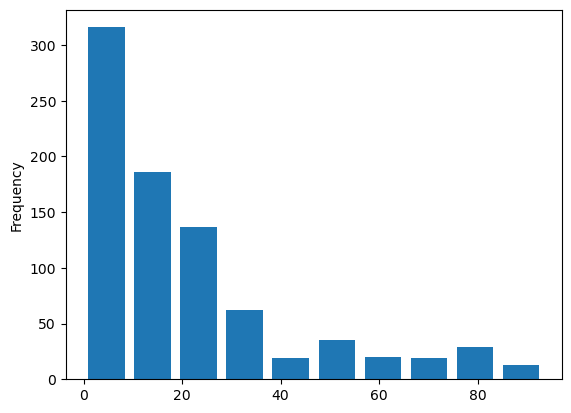

In [40]:
data_total1_df4["Fare"].plot(kind='hist', rwidth=0.8)

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Sex'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>,
        <Axes: title={'center': 'Number'}>, <Axes: >]], dtype=object)

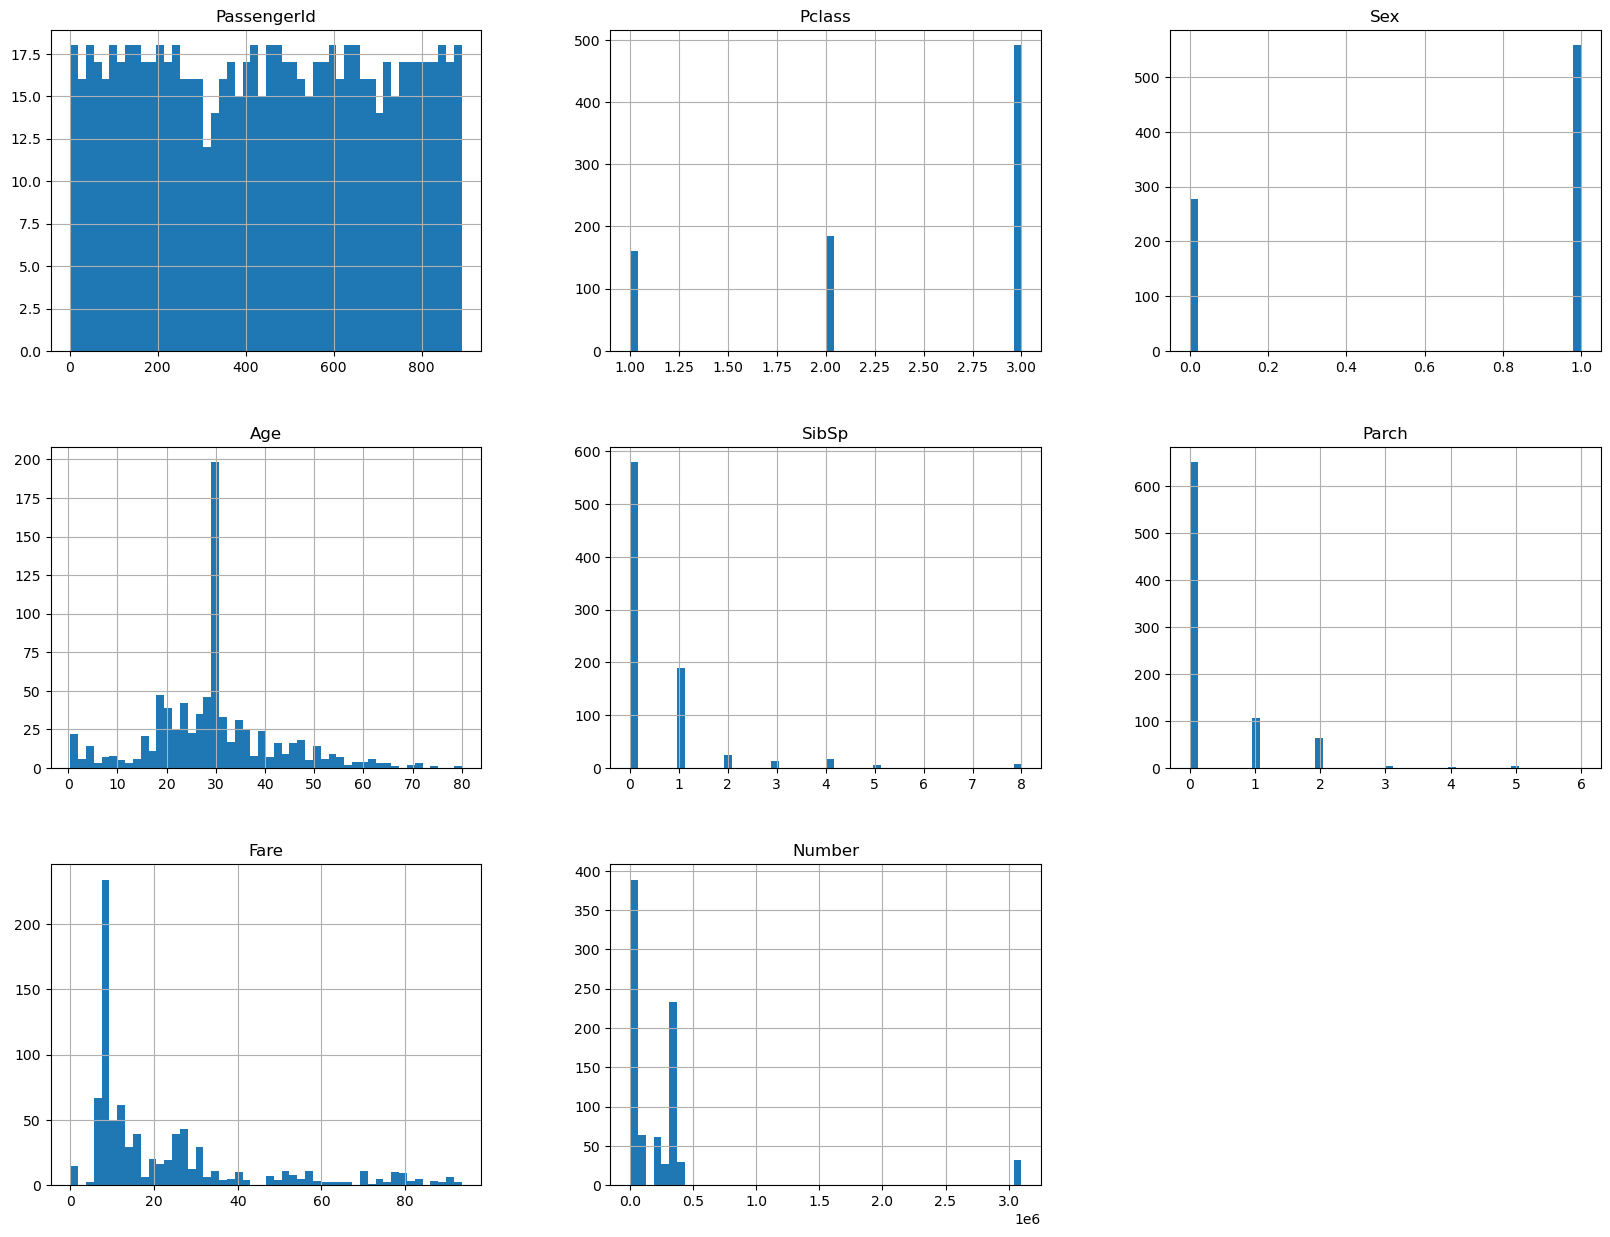

In [41]:
data_total1_df4.hist(bins=50, figsize=(20,15))

In [42]:
data_total1_df4["Fare"].describe()

count    836.000000
mean      22.274172
std       20.660337
min        0.000000
25%        7.895800
50%       13.000000
75%       27.720800
max       93.500000
Name: Fare, dtype: float64

In [43]:
def get_fence(Q1, Q3):
    IQR = Q3 - Q1
    return Q1 - 1.5*IQR, Q3 + 1.5*IQR


for i in ["Fare", "Age", "SibSp", "Parch", "Number"]:
    print(f'Upper and Lower fence for {i} is', get_fence(data_total1_df4[i].quantile(0.25), data_total1_df4[i].quantile(0.75)))


Upper and Lower fence for Fare is (-21.841699999999996, 57.458299999999994)
Upper and Lower fence for Age is (3.0625, 53.5625)
Upper and Lower fence for SibSp is (-1.5, 2.5)
Upper and Lower fence for Parch is (0.0, 0.0)
Upper and Lower fence for Number is (-488011.125, 848137.875)


<Axes: ylabel='Frequency'>

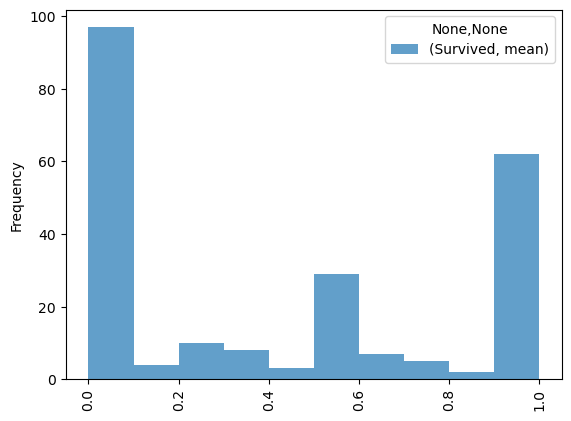

In [44]:
data_total1_df4.groupby("Fare").agg({"Survived" : ["mean"]}).plot(kind='hist', alpha=0.7, rot = 90)

In [45]:
# Filter for outliers
data_total1_df5 = data_total1_df4.copy()
data_total1_df5 = data_total1_df5[data_total1_df5["Age"] < 80]
data_total1_df5 = data_total1_df5[data_total1_df5["Parch"] < 4]
data_total1_df5 = data_total1_df5[data_total1_df5["SibSp"] < 5]
data_total1_df5 = data_total1_df5.drop("PassengerId", axis="columns")

In [46]:
data_total1_df5[data_total1_df5["Fare"] < 4] # Free ticket is impossible, so we will drop these rows

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Number,Title
179,False,3,1,36.000000,0,0,0.0,S,17477,Mr
263,False,1,1,40.000000,0,0,0.0,S,112059,Mr
271,True,3,1,25.000000,0,0,0.0,S,17477,Mr
277,False,2,1,29.536411,0,0,0.0,S,239853,Mr
302,False,3,1,19.000000,0,0,0.0,S,17477,Mr
413,False,2,1,29.536411,0,0,0.0,S,239853,Mr
466,False,2,1,29.536411,0,0,0.0,S,239853,Mr
481,False,2,1,29.536411,0,0,0.0,S,239854,Mr
597,False,3,1,49.000000,0,0,0.0,S,17477,Mr
633,False,1,1,29.536411,0,0,0.0,S,112052,Mr


In [47]:
data_total1_df5 = data_total1_df5[data_total1_df5["Fare"] > 4]

<Axes: xlabel='Title'>

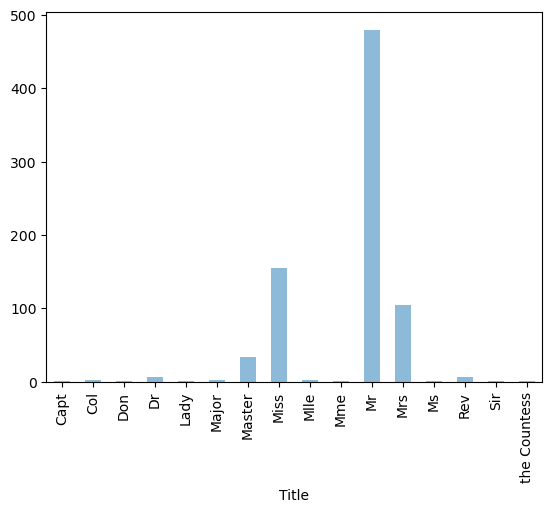

In [48]:
data_total1_df5.groupby("Title")["Title"].agg("count").plot(kind='bar', alpha=0.5, rot = 90)

In [49]:
title_dummies = pd.get_dummies(data_total1_df5["Title"], drop_first=True)
embarked_dummies = pd.get_dummies(data_total1_df5["Embarked"], drop_first=True)

In [50]:
data_total1_df5["Survived"] = data_total1_df5["Survived"].astype(bool) 

In [51]:
data_total1_df5[data_total1_df5["Age"].round() !=  data_total1_df5["Age"]].groupby("Age").agg("count")

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Number,Title
Age,,,,,,,,,
0.420000,1,1,1,1,1,1,1,1,1
0.670000,1,1,1,1,1,1,1,1,1
0.750000,2,2,2,2,2,2,2,2,2
0.830000,2,2,2,2,2,2,2,2,2
14.500000,1,1,1,1,1,1,1,1,1
20.500000,1,1,1,1,1,1,1,1,1
23.500000,1,1,1,1,1,1,1,1,1
24.500000,1,1,1,1,1,1,1,1,1
28.500000,2,2,2,2,2,2,2,2,2


Number of passengers with ticket number > 1000000: 31


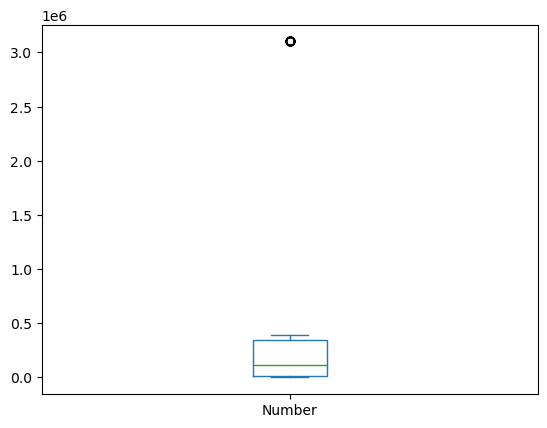

In [52]:
data_total1_df5["Number"].plot(kind='box', rot = 0)
print("Number of passengers with ticket number > 1000000:", data_total1_df5[data_total1_df5["Number"] > 850000]["Number"].agg("count"))
# Plenty of outliers, but we will keep it for now

<Axes: ylabel='Frequency'>

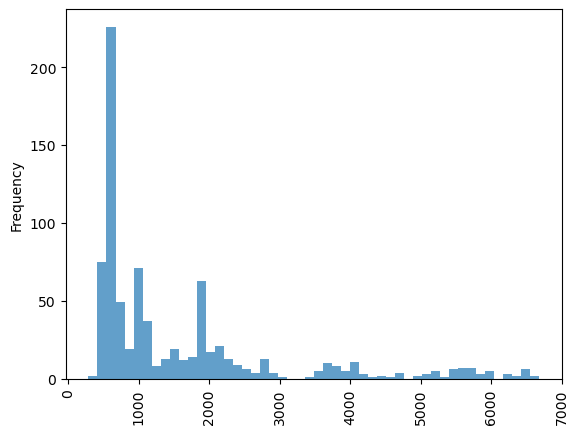

In [53]:
inflation_adjusted = pd.Series()
inflation_adjusted = data_total1_df5["Fare"] * 71.456
inflation_adjusted.plot(kind='hist', bins=50, alpha=0.7, rot = 90)

[]

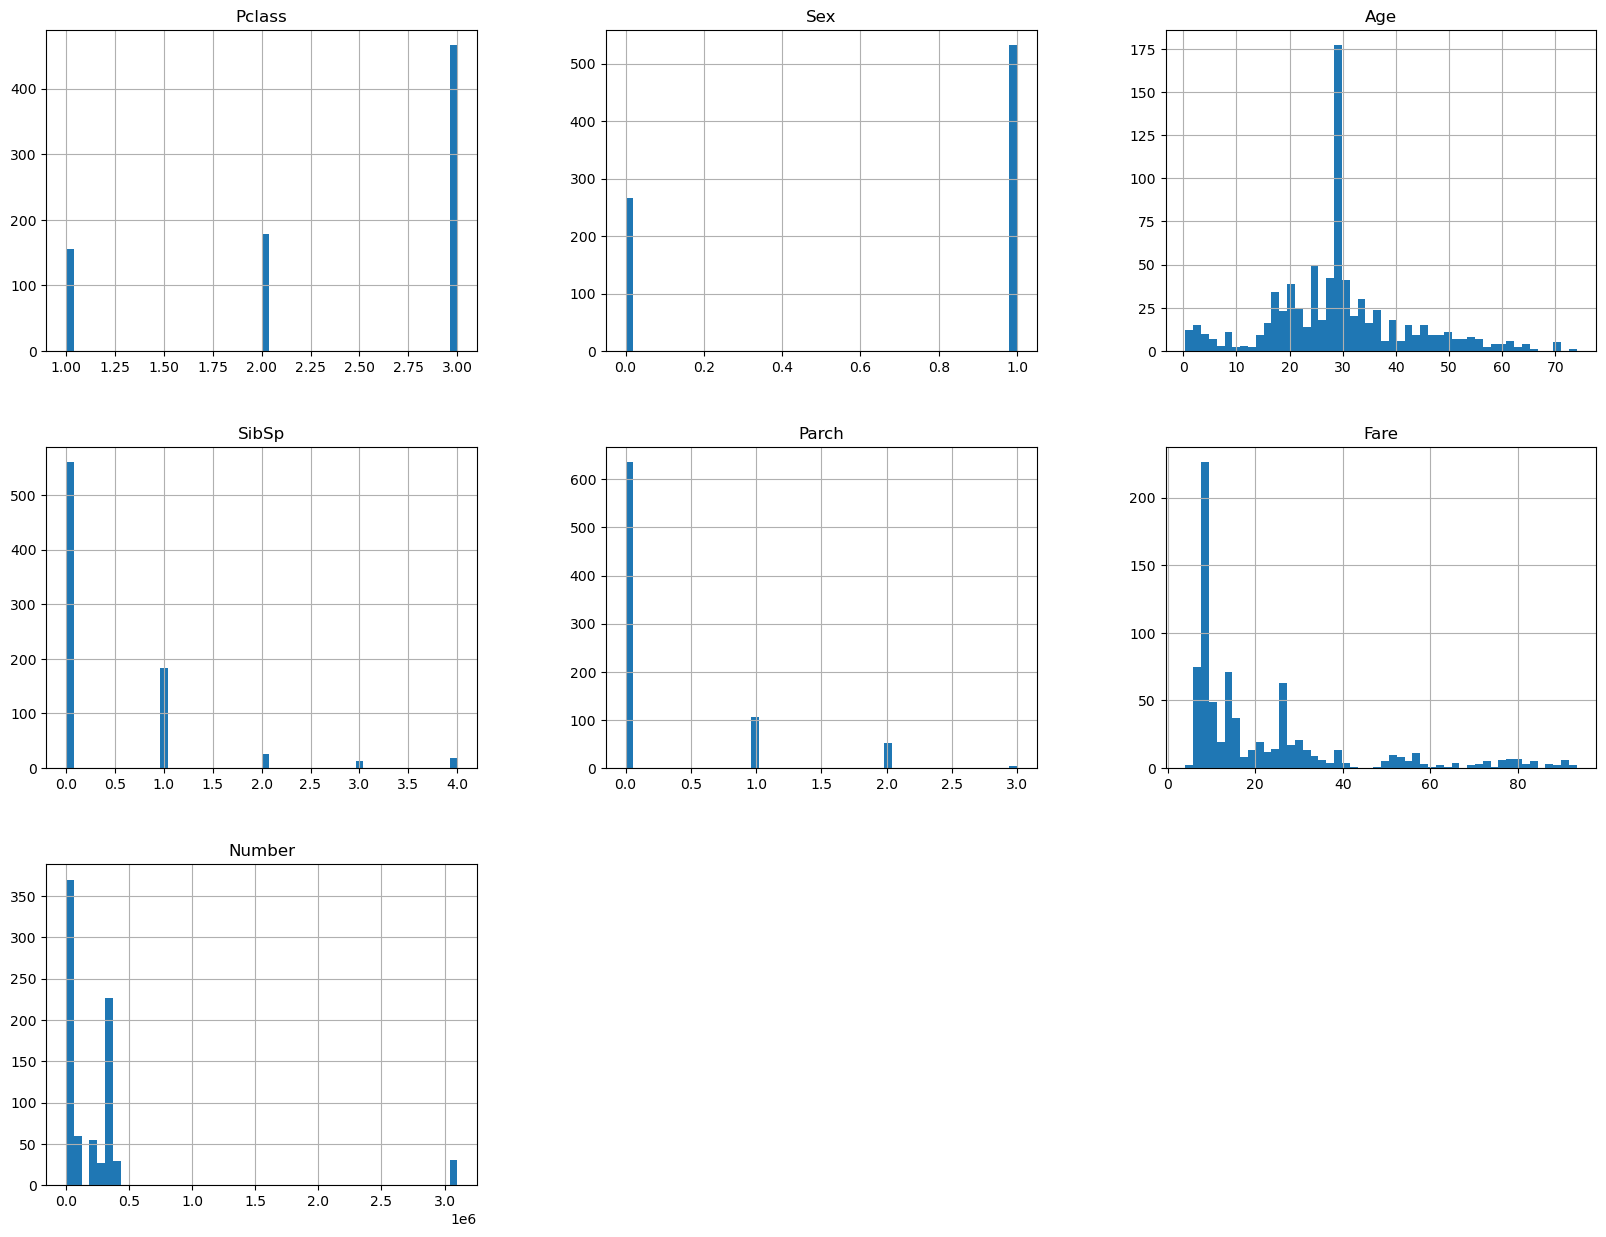

In [54]:
data_total1_df5.hist(bins=50, figsize=(20,15))
plt.plot()

In [55]:
data_total1_df6 = pd.concat([data_total1_df5, title_dummies, embarked_dummies], axis=1)
data_total1_df6.drop(["Title", "Embarked"], axis=1, inplace=True)
data_total1_df6

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Number,Col,Don,...,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess,Q,S
0,False,3,1,22.000000,1,0,7.2500,21171,False,False,...,False,False,True,False,False,False,False,False,False,True
1,True,1,0,38.000000,1,0,71.2833,17599,False,False,...,False,False,False,True,False,False,False,False,False,False
2,True,3,0,26.000000,0,0,7.9250,3101282,False,False,...,False,False,False,False,False,False,False,False,False,True
3,True,1,0,35.000000,1,0,53.1000,113803,False,False,...,False,False,False,True,False,False,False,False,False,True
4,False,3,1,35.000000,0,0,8.0500,373450,False,False,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,2,1,27.000000,0,0,13.0000,211536,False,False,...,False,False,False,False,False,True,False,False,False,True
887,True,1,0,19.000000,0,0,30.0000,112053,False,False,...,False,False,False,False,False,False,False,False,False,True
888,False,3,0,29.536411,1,2,23.4500,6607,False,False,...,False,False,False,False,False,False,False,False,False,True
889,True,1,1,26.000000,0,0,30.0000,111369,False,False,...,False,False,True,False,False,False,False,False,False,False


<Axes: >

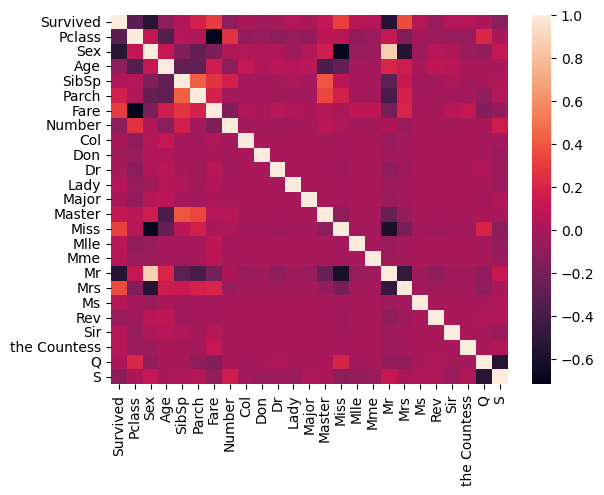

In [56]:
sns.heatmap(data_total1_df6.corr(), annot=False)

In [57]:
# Start building models
data_for_prediction = np.array([   2, 1, 18, 1, 2, 15, 102041, 0,
                                   0, 0, 0, 0, 0, 0, 0, 0, 0,
                                   0, 1, 0, 0, 0, 0, 0])

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [59]:
X = data_total1_df6.drop("Survived", axis=1)
y = data_total1_df6["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [60]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
# confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
log_reg.predict_proba(data_for_prediction.reshape(1, -1))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.73      0.92      0.82       144
        True       0.81      0.49      0.61        96

    accuracy                           0.75       240
   macro avg       0.77      0.71      0.71       240
weighted avg       0.76      0.75      0.73       240

[[133  11]
 [ 49  47]]
0.75


e:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
e:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [61]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
dtree.predict_proba(data_for_prediction.reshape(1, -1))

              precision    recall  f1-score   support

       False       0.80      0.76      0.78       144
        True       0.67      0.72      0.69        96

    accuracy                           0.75       240
   macro avg       0.74      0.74      0.74       240
weighted avg       0.75      0.75      0.75       240

[[110  34]
 [ 27  69]]


e:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[0., 1.]])

In [71]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
rfc.predict_proba(data_for_prediction.reshape(1, -1))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.84      0.89      0.86       144
        True       0.82      0.75      0.78        96

    accuracy                           0.83       240
   macro avg       0.83      0.82      0.82       240
weighted avg       0.83      0.83      0.83       240

[[128  16]
 [ 24  72]]
0.8333333333333334


e:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


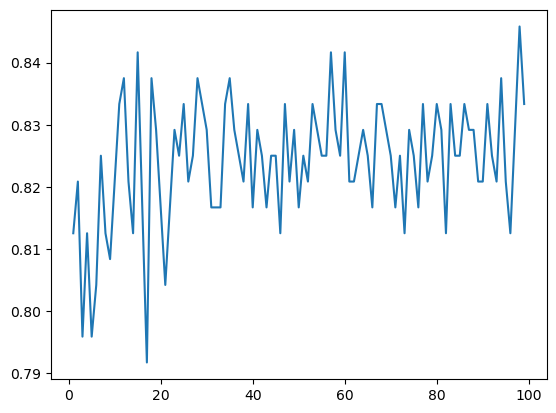

In [75]:
score_array = []
for i in range(1, 100):
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    score_array.append(rfc.score(X_test, y_test))
plt.plot(range(1, 100), score_array)

In [76]:
# Getting the best and worse score for the random forest classifier
roc_auc = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')
print(roc_auc.max(), roc_auc.min(), roc_auc.mean())

0.9223333333333333 0.7753333333333335 0.8622424611223801


In [77]:
from sklearn.svm import SVC
svc = SVC(C=0.9, kernel='rbf', degree=3, gamma='auto')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
svc.predict(data_for_prediction.reshape(1, -1))

              precision    recall  f1-score   support

       False       0.61      0.97      0.75       144
        True       0.64      0.07      0.13        96

    accuracy                           0.61       240
   macro avg       0.62      0.52      0.44       240
weighted avg       0.62      0.61      0.50       240

[[140   4]
 [ 89   7]]


e:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([False])

In [78]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
knn.predict(data_for_prediction.reshape(1, -1))


              precision    recall  f1-score   support

       False       0.68      0.81      0.74       144
        True       0.59      0.43      0.50        96

    accuracy                           0.65       240
   macro avg       0.64      0.62      0.62       240
weighted avg       0.64      0.65      0.64       240

[[116  28]
 [ 55  41]]


e:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([ True])

0.7783333333333333 0.502 0.6722989858012169


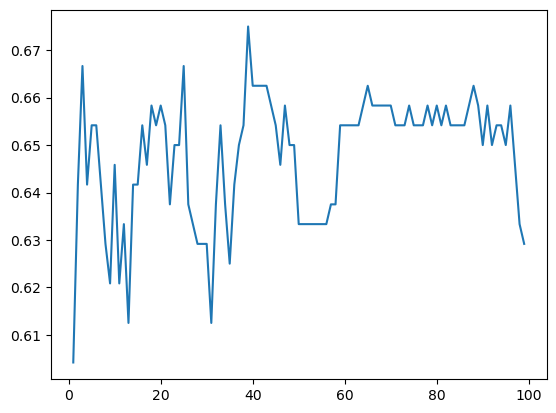

In [79]:
score_array = []
for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score_array.append(knn.score(X_test, y_test))
plt.plot(range(1, 100), score_array)
roc_auc = cross_val_score(knn, X, y, cv=10, scoring='roc_auc')
print(roc_auc.max(), roc_auc.min(), roc_auc.mean())

In [80]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=300, learning_rate=1.0, max_depth=1, random_state=0)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
gbc.predict(data_for_prediction.reshape(1, -1))

              precision    recall  f1-score   support

       False       0.82      0.90      0.86       144
        True       0.82      0.71      0.76        96

    accuracy                           0.82       240
   macro avg       0.82      0.80      0.81       240
weighted avg       0.82      0.82      0.82       240

[[129  15]
 [ 28  68]]


e:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [69]:
from sklearn.model_selection import GridSearchCV


In [131]:
import xgboost as xgb
xgbc = xgb.XGBClassifier()
xgbc.fit(X_train, y_train)
y_pred = xgbc.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
xgbc.predict(data_for_prediction.reshape(1, -1))

              precision    recall  f1-score   support

       False       0.82      0.90      0.85       144
        True       0.82      0.70      0.75        96

    accuracy                           0.82       240
   macro avg       0.82      0.80      0.80       240
weighted avg       0.82      0.82      0.81       240

[[129  15]
 [ 29  67]]


array([1])

In [141]:
# Preparing data for tensorflow
tf_data = data_total1_df6.copy()
tf_data = tf_data.replace(True, 1)
tf_data = tf_data.replace(False, 0)
tf_data = tf_data.astype(int)
tf_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Number,Col,Don,...,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess,Q,S
0,0,3,1,22,1,0,7,21171,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,1,0,38,1,0,71,17599,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,3,0,26,0,0,7,3101282,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,0,35,1,0,53,113803,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,3,1,35,0,0,8,373450,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27,0,0,13,211536,0,0,...,0,0,0,0,0,1,0,0,0,1
887,1,1,0,19,0,0,30,112053,0,0,...,0,0,0,0,0,0,0,0,0,1
888,0,3,0,29,1,2,23,6607,0,0,...,0,0,0,0,0,0,0,0,0,1
889,1,1,1,26,0,0,30,111369,0,0,...,0,0,1,0,0,0,0,0,0,0


In [142]:
import tensorflow as tf
from tensorflow import keras
import time

before = time.time()

X = tf_data.drop("Survived", axis=1)
y = tf_data["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = keras.models.Sequential([
    keras.layers.Dense(12, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(12, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=200)

after = time.time()
print("time taken: ", after - before)



Epoch 1/200


18/18 [==============================] - 1s 3ms/step - loss: 6285.8174 - accuracy: 0.6386
Epoch 2/200
18/18 [==============================] - 0s 2ms/step - loss: 4093.0022 - accuracy: 0.6386
Epoch 3/200
18/18 [==============================] - 0s 2ms/step - loss: 2158.7754 - accuracy: 0.6333
Epoch 4/200
18/18 [==============================] - 0s 2ms/step - loss: 410.7916 - accuracy: 0.5420
Epoch 5/200
18/18 [==============================] - 0s 2ms/step - loss: 65.8810 - accuracy: 0.5850
Epoch 6/200
18/18 [==============================] - 0s 2ms/step - loss: 31.7744 - accuracy: 0.5564
Epoch 7/200
18/18 [==============================] - 0s 2ms/step - loss: 120.1279 - accuracy: 0.5492
Epoch 8/200
18/18 [==============================] - 0s 2ms/step - loss: 81.2212 - accuracy: 0.5796
Epoch 9/200
18/18 [==============================] - 0s 3ms/step - loss: 33.5517 - accuracy: 0.5886
Epoch 10/200
18/18 [==============================] - 0s 2ms/step - loss: 52.1982 - accu

In [73]:
model.predict(data_for_prediction.reshape(1, -1))

1/1 [==============================] - 0s 89ms/step


array([[8.477478e-30]], dtype=float32)

In [143]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
import time

before = time.time()
new_model = Sequential()
new_model.add(Dense(units = 32, input_dim=len(X_train.columns), activation='relu'))
new_model.add(Dense(units = 64, activation='relu'))
new_model.add(Dense(units = 1, activation='sigmoid'))

new_model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
new_model.fit(X_train, y_train, epochs=200)
after = time.time()
print("time taken: ", after - before)

Epoch 1/200
18/18 [==============================] - 1s 2ms/step - loss: 228660396032.0000 - accuracy: 0.5832
Epoch 2/200
18/18 [==============================] - 0s 2ms/step - loss: 0.6892 - accuracy: 0.6386
Epoch 3/200
18/18 [==============================] - 0s 2ms/step - loss: 0.6862 - accuracy: 0.6386
Epoch 4/200
18/18 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.6386
Epoch 5/200
18/18 [==============================] - 0s 2ms/step - loss: 0.6810 - accuracy: 0.6386
Epoch 6/200
18/18 [==============================] - 0s 2ms/step - loss: 0.6787 - accuracy: 0.6386
Epoch 7/200
18/18 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.6386
Epoch 8/200
18/18 [==============================] - 0s 2ms/step - loss: 0.6746 - accuracy: 0.6386
Epoch 9/200
18/18 [==============================] - 0s 2ms/step - loss: 0.6729 - accuracy: 0.6386
Epoch 10/200
18/18 [==============================] - 0s 2ms/step - loss: 0.6714 - accuracy: 0.638

In [75]:
new_model.predict(data_for_prediction.reshape(1, -1))

1/1 [==============================] - 0s 65ms/step


array([[0.36149907]], dtype=float32)

In [76]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Number', 'Col',
       'Don', 'Dr', 'Lady', 'Major', 'Master', 'Miss', 'Mlle', 'Mme', 'Mr',
       'Mrs', 'Ms', 'Rev', 'Sir', 'the Countess', 'Q', 'S'],
      dtype='object')

# Based on the above, I am very unlikely to live

<Axes: >

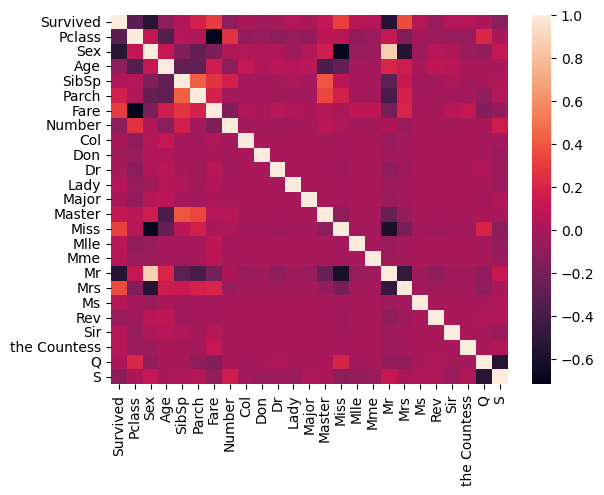

In [92]:
data_total2 = data_total1_df6.copy()
sns.heatmap(data_total2.corr(), annot=False)

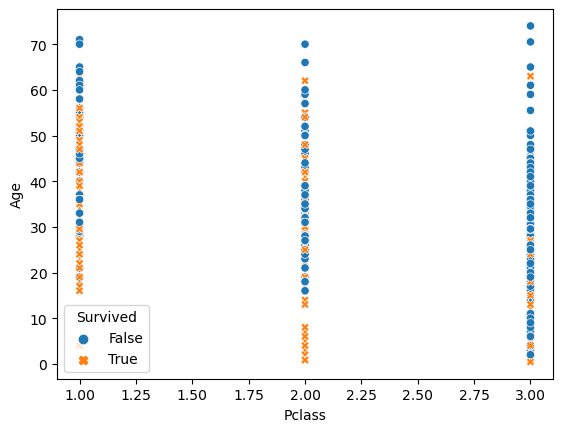

In [93]:
sns.scatterplot(x='Pclass', y='Age', hue='Survived', style='Survived', data=data_total2)
plt.show() # Most of the third class passengers died


<Axes: xlabel='Age', ylabel='Count'>

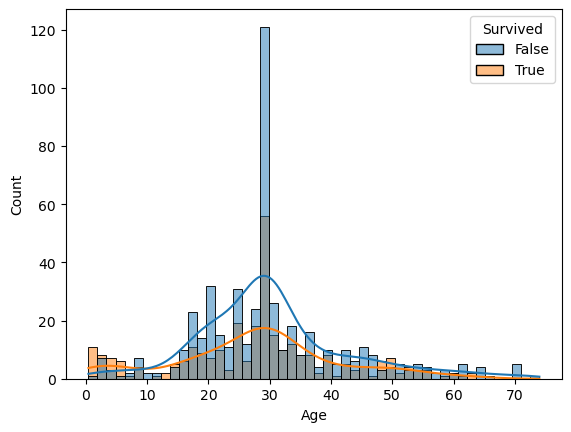

In [94]:
sns.histplot(data_total2, x="Age", hue="Survived", kde=True, bins=50)
# A big spike at 29 because fillna was used to fill the missing values

<Axes: xlabel='Number', ylabel='Count'>

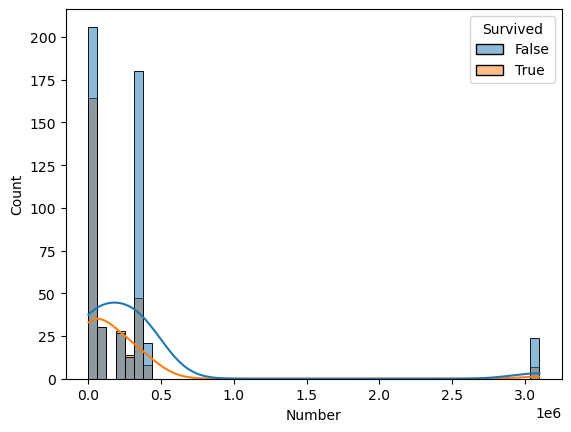

In [95]:
sns.histplot(data_total2, x="Number", hue="Survived", kde=True, bins=50)
# The higher the ticket number, the more likely the passenger died

In [96]:
# Drop the ticket number
data_total2.drop("Number", axis=1, inplace=True)

In [97]:
X_2 = data_total2.drop("Survived", axis=1)
y_2 = data_total2["Survived"]

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=42)

In [98]:
# Comparing the most accurate models
xgbc_2 = xgb.XGBClassifier()
xgbc_2.fit(X_train_2, y_train_2)
y_pred_2 = xgbc_2.predict(X_test_2)
print(classification_report(y_test_2, y_pred_2))
print(confusion_matrix(y_test_2, y_pred_2))
# xgbc_2.predict(data_for_prediction.reshape(1, -1))

              precision    recall  f1-score   support

       False       0.82      0.86      0.84       144
        True       0.78      0.72      0.75        96

    accuracy                           0.80       240
   macro avg       0.80      0.79      0.79       240
weighted avg       0.80      0.80      0.80       240

[[124  20]
 [ 27  69]]


In [99]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Neglibible difference in accuracy

              precision    recall  f1-score   support

       False       0.82      0.90      0.85       144
        True       0.82      0.70      0.75        96

    accuracy                           0.82       240
   macro avg       0.82      0.80      0.80       240
weighted avg       0.82      0.82      0.81       240

[[129  15]
 [ 29  67]]


In [ ]:
# That is all for now, I will try to improve the model later

In [100]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train_2)
X_train_2 = scaler.transform(X_train_2)
X_test_2 = scaler.transform(X_test_2)

X_train_2

array([[1.        , 1.        , 0.39365078, ..., 0.        , 0.        ,
        1.        ],
       [0.5       , 0.        , 0.33178781, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 1.        , 0.27723987, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.5       , 1.        , 0.48179463, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.39365078, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 1.        , 0.63180145, ..., 0.        , 0.        ,
        1.        ]])

In [101]:
xgbc_3 = xgb.XGBClassifier()
xgbc_3.fit(X_train_2, y_train_2)
y_pred_3 = xgbc_3.predict(X_test_2)
print(classification_report(y_test_2, y_pred_3))
print(confusion_matrix(y_test_2, y_pred_3))
# Zero difference in accuracy

              precision    recall  f1-score   support

       False       0.82      0.86      0.84       144
        True       0.78      0.72      0.75        96

    accuracy                           0.80       240
   macro avg       0.80      0.79      0.79       240
weighted avg       0.80      0.80      0.80       240

[[124  20]
 [ 27  69]]


In [102]:
# Saving the model for use in another notebook
import pickle
pickle.dump(xgbc, open("titanic_model.pkl", "wb"))

In [64]:
data_total1_df6

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Number,Col,Don,...,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess,Q,S
0,False,3,1,22.000000,1,0,7.2500,21171,False,False,...,False,False,True,False,False,False,False,False,False,True
1,True,1,0,38.000000,1,0,71.2833,17599,False,False,...,False,False,False,True,False,False,False,False,False,False
2,True,3,0,26.000000,0,0,7.9250,3101282,False,False,...,False,False,False,False,False,False,False,False,False,True
3,True,1,0,35.000000,1,0,53.1000,113803,False,False,...,False,False,False,True,False,False,False,False,False,True
4,False,3,1,35.000000,0,0,8.0500,373450,False,False,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,2,1,27.000000,0,0,13.0000,211536,False,False,...,False,False,False,False,False,True,False,False,False,True
887,True,1,0,19.000000,0,0,30.0000,112053,False,False,...,False,False,False,False,False,False,False,False,False,True
888,False,3,0,29.536411,1,2,23.4500,6607,False,False,...,False,False,False,False,False,False,False,False,False,True
889,True,1,1,26.000000,0,0,30.0000,111369,False,False,...,False,False,True,False,False,False,False,False,False,False


In [117]:
a = data_test.columns
len(a)
a

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Number', 'Don', 'Dr',
       'Master', 'Miss', 'Mr', 'Mrs', 'Ms', 'Rev', 'Q', 'S', 'Col', 'Lady',
       'Major', 'Mlle', 'Mme', 'Sir', 'the Countess'],
      dtype='object')

In [118]:
b = data_total1_df6.columns
len(b)
b

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Number',
       'Col', 'Don', 'Dr', 'Lady', 'Major', 'Master', 'Miss', 'Mlle', 'Mme',
       'Mr', 'Mrs', 'Ms', 'Rev', 'Sir', 'the Countess', 'Q', 'S'],
      dtype='object')

In [ ]:
# col, dr, lady, major, mlle, mme, sir, the countess

In [ ]:
#Todo: strip ticket number of test set
#Todo: get dummies for title and embarked
#Todo: change type for sex

In [78]:
data_test.drop(["Cabin"], axis=1, inplace=True)

In [80]:
data_test["Title"] = data_test["Name"].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
data_test.drop("Name", axis=1, inplace=True)

In [83]:
data_test.drop("PassengerId", axis=1, inplace=True)

In [93]:
data_test["Number"] = 0

In [95]:
data_test.drop("Ticket", axis=1, inplace=True)

In [98]:
data_test_embark_dummy = pd.get_dummies(data_test["Embarked"], drop_first=True)
data_test_title_dummy = pd.get_dummies(data_test["Title"], drop_first=True)

In [99]:
data_test.drop(["Embarked", "Title"], axis=1, inplace=True)
data_test = pd.concat([data_test, data_test_title_dummy, data_test_embark_dummy], axis=1)

In [104]:
data_test.rename(columns={"Dona":"Don"}, inplace=True)

In [106]:
# col, dr, lady, major, mlle, mme, sir, the countess
data_test["Col"] = 0
data_test["Dr"] = 0
data_test["Lady"] = 0
data_test["Major"] = 0
data_test["Mlle"] = 0
data_test["Mme"] = 0
data_test["Sir"] = 0
data_test["the Countess"] = 0


In [119]:
new_order = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Number',
       'Col', 'Don', 'Dr', 'Lady', 'Major', 'Master', 'Miss', 'Mlle', 'Mme',
       'Mr', 'Mrs', 'Ms', 'Rev', 'Sir', 'the Countess', 'Q', 'S']

In [120]:
data_test = data_test.reindex(columns=new_order)

In [122]:
data_test.dtypes

Pclass            int64
Sex              object
Age             float64
SibSp             int64
Parch             int64
Fare            float64
Number            int64
Col               int64
Don                bool
Dr                int64
Lady              int64
Major             int64
Master             bool
Miss               bool
Mlle              int64
Mme               int64
Mr                 bool
Mrs                bool
Ms                 bool
Rev                bool
Sir               int64
the Countess      int64
Q                  bool
S                  bool
dtype: object

In [125]:
data_test["Sex"].replace("female", 0, inplace=True)
data_test["Sex"].replace("male", 1, inplace=True)

In [135]:
data_test.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Number', 'Col',
       'Don', 'Dr', 'Lady', 'Major', 'Master', 'Miss', 'Mlle', 'Mme', 'Mr',
       'Mrs', 'Ms', 'Rev', 'Sir', 'the Countess', 'Q', 'S'],
      dtype='object')

In [128]:
data_total1_df6.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Number',
       'Col', 'Don', 'Dr', 'Lady', 'Major', 'Master', 'Miss', 'Mlle', 'Mme',
       'Mr', 'Mrs', 'Ms', 'Rev', 'Sir', 'the Countess', 'Q', 'S'],
      dtype='object')

In [129]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pclass        418 non-null    int64  
 1   Sex           418 non-null    int64  
 2   Age           332 non-null    float64
 3   SibSp         418 non-null    int64  
 4   Parch         418 non-null    int64  
 5   Fare          417 non-null    float64
 6   Number        418 non-null    int64  
 7   Col           418 non-null    int64  
 8   Don           418 non-null    bool   
 9   Dr            418 non-null    int64  
 10  Lady          418 non-null    int64  
 11  Major         418 non-null    int64  
 12  Master        418 non-null    bool   
 13  Miss          418 non-null    bool   
 14  Mlle          418 non-null    int64  
 15  Mme           418 non-null    int64  
 16  Mr            418 non-null    bool   
 17  Mrs           418 non-null    bool   
 18  Ms            418 non-null    

In [130]:
data_test["Age"].fillna(data_test["Age"].mean(), inplace=True)
data_test["Fare"].fillna(data_test["Fare"].mean(), inplace=True)

In [132]:
y_pred = xgbc.predict(data_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,

In [133]:
data_test_with_survival = pd.concat([data_test, pd.Series(y_pred, name="Survived")], axis=1)

In [138]:
data_test_with_survival = data_test_with_survival.reindex(columns=['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Number', 'Col',
       'Don', 'Dr', 'Lady', 'Major', 'Master', 'Miss', 'Mlle', 'Mme', 'Mr',
       'Mrs', 'Ms', 'Rev', 'Sir', 'the Countess', 'Q', 'S'])

In [139]:
data_test_with_survival

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Number,Col,Don,...,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess,Q,S
0,0,3,1,34.50000,0,0,7.8292,0,0,False,...,0,0,True,False,False,False,0,0,True,False
1,0,3,0,47.00000,1,0,7.0000,0,0,False,...,0,0,False,True,False,False,0,0,False,True
2,0,2,1,62.00000,0,0,9.6875,0,0,False,...,0,0,True,False,False,False,0,0,True,False
3,0,3,1,27.00000,0,0,8.6625,0,0,False,...,0,0,True,False,False,False,0,0,False,True
4,1,3,0,22.00000,1,1,12.2875,0,0,False,...,0,0,False,True,False,False,0,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,3,1,30.27259,0,0,8.0500,0,0,False,...,0,0,True,False,False,False,0,0,False,True
414,1,1,0,39.00000,0,0,108.9000,0,0,True,...,0,0,False,False,False,False,0,0,False,False
415,0,3,1,38.50000,0,0,7.2500,0,0,False,...,0,0,True,False,False,False,0,0,False,True
416,0,3,1,30.27259,0,0,8.0500,0,0,False,...,0,0,True,False,False,False,0,0,False,True
